# Thermodynamic analysis of strategy enabling anaerobic production of PHB

In this script, we have performed the MDF analyses for the thermodynamic investigation of the NOG+EMP pathway in comparison to other strategies enabling PHB production, also demonstrating how the analysis of other pathways and metabolic engineering strategies could be analyzed by other researchers with the custom-made functions we have developed in this study.

In [1]:
from equilibrator_api import Q_ #for creating quantity variables
import equilibrator_custom_functions as eq #custom functions created during analysis
import numpy as np #numerical package
import math
import matplotlib.pyplot as plt #plotting package

Fragments already downloaded
Fragments already downloaded


# Input Files and their formats

The script's input is based on the two custom __input csv files__, which are:

   __The compound file__, with metabolite names, IDs and bounds. It is currently name "metabolite_reference_table"
   
   This file uses a custom csv file format, which contains information of multiple metabolites, to create a dictionary which will be used for the eQuilibrator API for high throughput analysis. This dictionary allows for writing reactions in a simpler way (with acronyms), and customizing the ranges of metabolites according to data. The columns contain the following elements:

| Metabolite Acronym        | keggID                          | Lower Bound (M)             | Upper Bound (M)               |
|------------------|----------------------------------|----------------------|------------------------|
|Custom-defined name for metabolite| Kegg ID to identify metabolite (necessary to use specific kegg ID) | Custom-defined minimal concentration (in M)| Custom-defined maximal concentration (in M) |

Notice that the column names do not need to be mantained in order to be recognized in the script. More usefull information can be added to the other columns, as the script will ignore the information stored in these.

   __The pathway file__, with reaction names, formulae, fluxes, and, in the case of ECM, enzyme parameters (which will be read by other functions below). Being pathway specific, there are many files referenced in this script. The columns contain the follow basic setup:
   
| Reaction Formula        | Relative Flux                          | Reaction Name  |     Standard dG (kJ/mol)        | kcrf(1/s) | MWe(Da)        | kM(mM) |
|------------------|----------------------------------|----------------------|------------------------|-----------------|-------|-----|
|Using the acronyms defined in the compound file: S1 + S2 <=> P1 + P2| The relative stoichiometric coefficient of the reaction in the pathway | Customizable name to identify the reaction in graphs, for example | __(Optional)__ Standard Gibs Free Energy of Reaction in kJ/mol. These are custom values that can replace the values obtained from the eQuilibrator packages|__(Only needed for ECM)__ Forward catalytic rate of reaction's enzyme in 1/s (mind the direction of the reaction) |__(Only needed for ECM)__ Enzyme molecular weight, equivalent to Daltons |__(Only needed for ECM)__ Michaelis costants of each substrate and product (except water) in milimolar, with format example 'S1: 0.1 S2:0.02 P1:3 P2:0.3' | 

# Setting Intracellular Conditions

Below we set the intracellular conditions in *E. coli*, i.e the pH, ionic strengh, temperature and pMg (which have an effect on the thermodynamics of reactions). Note that metabolite concentration bounds are also organism specific, but are defined in the compound file.

In the cell bellow the name of the compound csv file is defined __("metabolite_reference_table")__. With the function __eq.obtain_compound_settings( string: compound_file_name )__, we construct a __CompoundSettings__ object containing data structures for idetifying compounds and setting their maximal and minimal concentrations for the model)

With __eq.change_bounds__ , one can create a new CompoundSettings object with specific changes in the metabolite concentration bounds.

The __eq.fix_concentrations__ function can also be used when the concentration needs to fixed at a specific concentration

In [2]:
#E. coli physiological conditions as a dictionary
E_coli_con = {
            "p_h": str(Q_("7.5")),
            "p_mg": str(Q_(10)),
            "ionic_strength": str(Q_('200 mM')),
            "temperature": str(Q_(37+273.15,"K")),
            "kcat_source": "fwd",
}

#Generating Compound Settings with the default eQuilibrator bounds
cs_default_bounds = eq.obtain_compound_settings("metabolite_reference_table", custom_bounds = False)

# Initial Max-min Driving Force (MDF) analysis

The MDF analysis can be quickly performed with the __eq.MDF_analysis__ function, receiving a full report of the results:

2.5 ADP + 2.5 Pi + 1.5 Sucrose <=> 5 H2O + 2.5 ATP + 2 CO2 + 2 PHB


'MDF = 3.334 kilojoule / mole'

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,SucP,Pi + Sucrose <=> Fructose + G1P,1.5 molar / second,-8.688747928841005 kilojoule / mole,-8.688747928841005 kilojoule / mole,-8.688747928841009 kilojoule / mole,0.000000e+00
1,Pgm,G1P <=> G6P,1.5 molar / second,-7.414946410704452 kilojoule / mole,-7.414946410704452 kilojoule / mole,-7.41494641070445 kilojoule / mole,0.000000e+00
2,Pgi,G6P <=> F6P,1.5 molar / second,2.504746329360183 kilojoule / mole,2.504746329360183 kilojoule / mole,-3.3336573913703202 kilojoule / mole,4.237707e-16
3,CscK,ATP + Fructose <=> ADP + F6P,1.5 molar / second,-18.47857882414626 kilojoule / mole,-18.47857882414626 kilojoule / mole,-30.021928389783767 kilojoule / mole,0.000000e+00
4,Tal,E4P + F6P <=> GADP + S7P,2.0 molar / second,0.6928028030912127 kilojoule / mole,0.6928028030912127 kilojoule / mole,-3.333657391370324 kilojoule / mole,2.931735e-16
5,Tkt,GADP + S7P <=> R5P + X5P,2.0 molar / second,3.8258091024354592 kilojoule / mole,3.8258091024354592 kilojoule / mole,-3.3336573913703105 kilojoule / mole,6.464280e-17
6,RpiA,R5P <=> Ru5P,2.0 molar / second,2.0079526585601943 kilojoule / mole,2.0079526585601943 kilojoule / mole,-3.33365739137032 kilojoule / mole,0.000000e+00
7,AraD,Ru5P <=> X5P,2.0 molar / second,-3.365693996619711 kilojoule / mole,-3.365693996619711 kilojoule / mole,-15.048414355687008 kilojoule / mole,0.000000e+00
8,Xpk,Pi + X5P <=> H2O + GADP + AcP,4.0 molar / second,-60.176984488506015 kilojoule / mole,-60.176984488506015 kilojoule / mole,-43.152654079508196 kilojoule / mole,0.000000e+00
9,TpiA,GADP <=> DAHP,1.0 molar / second,-5.524778053934204 kilojoule / mole,-5.524778053934204 kilojoule / mole,-5.524778053934211 kilojoule / mole,4.836720e-17


,compound,concentration,shadow_price,lower_bound,upper_bound
0,H2O,1.0 molar,-1.213008e-15,1.0 molar,1.0 molar
1,ATP,0.005000000000000002 molar,-1.243712e-16,0.005 molar,0.005 molar
2,ADP,0.0005000000000000001 molar,-4.125706e-17,0.0005 molar,0.0005 molar
3,NAD,0.001000000000000002 molar,0.000000e+00,0.001 molar,0.001 molar
4,Pi,0.010000000000000014 molar,5.972290e-17,0.01 molar,0.01 molar
5,NADH,9.999999999999991e-05 molar,-5.525240e-16,0.0001 molar,0.0001 molar
6,CoA,0.0009999999999999976 molar,-1.000000e+00,0.001 molar,0.001 molar
7,CO2,9.999999999999997e-06 molar,-2.042376e-18,1e-05 molar,1e-05 molar
8,AcCoA,0.010000000000000031 molar,2.000000e+00,1e-06 molar,0.01 molar
9,PYR,0.010000000000000004 molar,0.000000e+00,1e-06 molar,0.01 molar


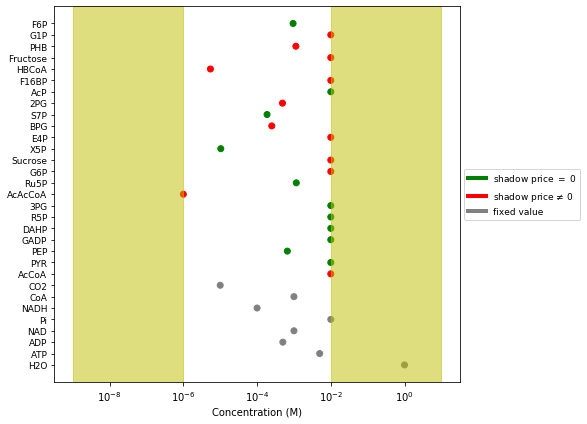

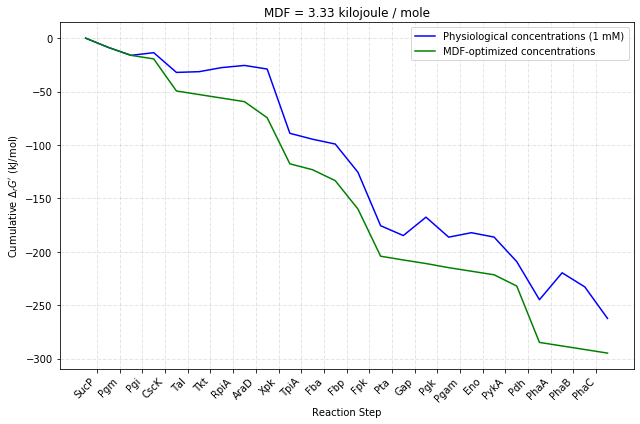

In [3]:
NOGEMP_result = eq.MDF_analysis("NOGEMP",cs_default_bounds,E_coli_con)

Multiple analyses can be performed without explicitly showing all results by using the optional argument __print_results = False__. Here we perform MDF analysis for all pathways. All the MDF values (__result.mdf__) and bottleneck reactions (obtained with __eq.pathway_bottlenecks__) are the same. The bottlenecks are identified as reactions with significant (>1e-5) shadow price values.

In [4]:
#A list of the pathway csv file names:
pathway_names = ['EMP','EDP','mEMP', 'PPPNOG', 'NOGEMP']
#Performing MDF analysis of all pathways
MDF_results = dict([(name, eq.MDF_analysis(name, cs_default_bounds, E_coli_con,custom_dGs = False, print_results = False)) for name in pathway_names])
for (pathway_name, result) in MDF_results.items():
    print(pathway_name + ':')
    print('    MDF = ' + str(result.mdf))
    print('    Bottleneck Reactions = ' + ', '.join(eq.pathway_bottlenecks(result)))

EMP:
    MDF = 3.333657391370332 kilojoule / mole
    Bottleneck Reactions = PhaA
EDP:
    MDF = 3.333657391370334 kilojoule / mole
    Bottleneck Reactions = PhaA
mEMP:
    MDF = 3.3336573913703385 kilojoule / mole
    Bottleneck Reactions = PhaA
PPPNOG:
    MDF = 3.333657391370334 kilojoule / mole
    Bottleneck Reactions = PhaA
NOGEMP:
    MDF = 3.3336573913703162 kilojoule / mole
    Bottleneck Reactions = PhaA


The detailed report of any of the results can be printed with __eq.print_MDF_results__:

'MDF = 3.334 kilojoule / mole'

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,Pts,Glucose + PEP <=> PYR + G6P,3.0 molar / second,-44.069317199412005 kilojoule / mole,-44.069317199412005 kilojoule / mole,-44.069317199412005 kilojoule / mole,0.000000e+00
1,Pgi,G6P <=> F6P,1.0 molar / second,2.504746329360183 kilojoule / mole,2.504746329360183 kilojoule / mole,-3.3336573913703402 kilojoule / mole,7.072009e-16
2,G6pd,NADP + G6P <=> NADPH + 6PGL,2.0 molar / second,-8.59241318095549 kilojoule / mole,-8.59241318095549 kilojoule / mole,-3.3336573913703362 kilojoule / mole,0.000000e+00
3,Pgls,H2O + 6PGL <=> 6PGC,2.0 molar / second,-26.79104763497954 kilojoule / mole,-26.79104763497954 kilojoule / mole,-26.344857579657678 kilojoule / mole,0.000000e+00
4,6pgd,NADP + 6PGC <=> NADPH + CO2 + Ru5P,2.0 molar / second,10.610157658603805 kilojoule / mole,-6.504679876117225 kilojoule / mole,-23.40861425311312 kilojoule / mole,0.000000e+00
5,AraD,Ru5P <=> X5P,4.0 molar / second,-3.365693996619711 kilojoule / mole,-3.365693996619711 kilojoule / mole,-3.3336573913703393 kilojoule / mole,-8.690020e-16
6,Xpk,Pi + X5P <=> H2O + GADP + AcP,6.0 molar / second,-60.176984488506015 kilojoule / mole,-60.176984488506015 kilojoule / mole,-51.20115322423036 kilojoule / mole,0.000000e+00
7,TpiA,GADP <=> DAHP,3.0 molar / second,-5.524778053934204 kilojoule / mole,-5.524778053934204 kilojoule / mole,-3.3336573913703353 kilojoule / mole,-4.761344e-16
8,Fba,GADP + DAHP <=> F16BP,3.0 molar / second,-21.625291050904107 kilojoule / mole,-4.510453516183075 kilojoule / mole,-8.024278698526217 kilojoule / mole,1.261870e-15
9,Fbp,H2O + F16BP <=> Pi + F6P,3.0 molar / second,-9.281489406359618 kilojoule / mole,-26.39632694108065 kilojoule / mole,-26.529784816904158 kilojoule / mole,0.000000e+00


,compound,concentration,shadow_price,lower_bound,upper_bound
0,H2O,1.0 molar,1.709512e-15,1.0 molar,1.0 molar
1,NADP,9.99999999999998e-06 molar,2.053504e-16,1e-05 molar,1e-05 molar
2,NADPH,0.00010000000000000009 molar,0.000000e+00,0.0001 molar,0.0001 molar
3,Pi,0.010000000000000004 molar,-1.665335e-15,0.01 molar,0.01 molar
4,CoA,0.0010000000000000002 molar,-1.000000e+00,0.001 molar,0.001 molar
5,CO2,9.99999999999998e-06 molar,-3.668212e-16,1e-05 molar,1e-05 molar
6,AcCoA,0.009999999999999995 molar,2.000000e+00,1e-06 molar,0.01 molar
7,PYR,0.010000000000000004 molar,6.837151e-18,1e-06 molar,0.01 molar
8,Glucose,0.010000000000000004 molar,-6.837151e-18,1e-06 molar,0.01 molar
9,PEP,0.010000000000000004 molar,-6.837151e-18,1e-06 molar,0.01 molar


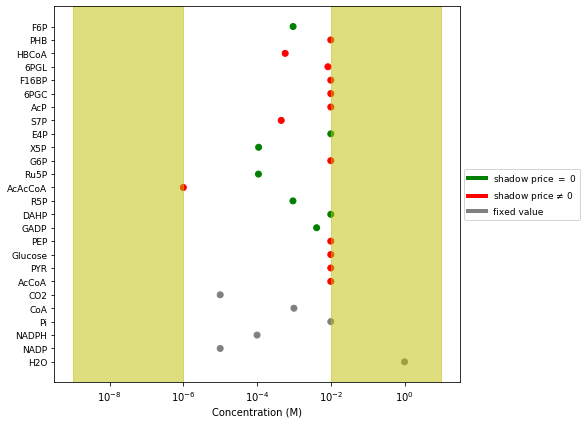

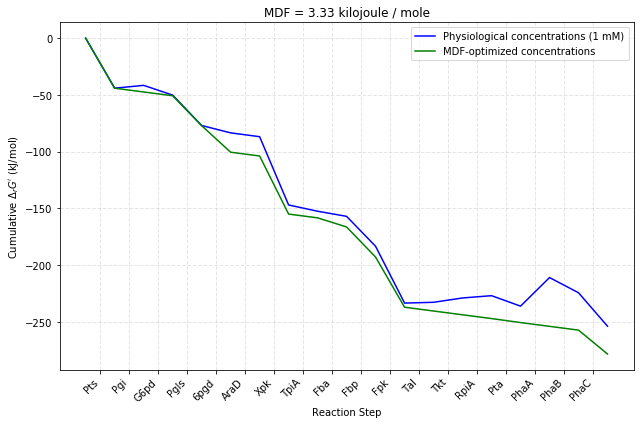

In [5]:
pathway_name = 'PPPNOG'
eq.print_MDF_results(MDF_results[pathway_name])

# Concentration Variability Analysis (CVA)

A function for easy execution of CVA has also been created, __eq.MDF_CVA__. The results will automatically be printed unless  __print_results = False__ is used. The optional argument __compounds__ can also be used to specify what metabolites will be analyzed, but by default CVA will be performed for all metabolites except water. The function will highlight which linear problems are unbounded (in which concentration could vary indefinitely) or unfeasible. CVA results are given in the form of a list of tuples with metabolite name, minimum and maximum concentrations and can be later plotted with __eq.CVA_plot__, for when the user would like to customize the plot layout:

CO2 min: unbounded
Sucrose max: unbounded
PHB min: unbounded


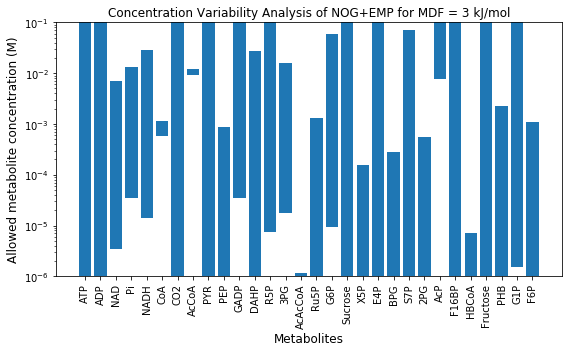

In [6]:
cva = eq.MDF_CVA(3, "NOGEMP",cs_default_bounds,E_coli_con, custom_dGs = False, print_results = False)
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot()
eq.CVA_plot(cva, ax=ax)
plt.ylabel('Allowed metabolite concentration (M)',fontsize=12)
plt.xlabel('Metabolites',fontsize=12)
ax.set_title('Concentration Variability Analysis of NOG+EMP for MDF = 3 kJ/mol', fontsize=12)
plt.tight_layout()

# MDF sensitivity to AcCoA/CoA ratios

To calculate the MDF for different ratios of metabolites, one can use __eq.MDF_ratio_sweep__, supplying the names of the numerator and denominator metabolites, the range of ratios (in an array) and concentration sum of both metabolites, which will be fixed for all ratios. The calculated concentration ranges for the numerator and denominator metabolites are also returned by the function. If you would like to perform a sweep of the concentration of a single metabolite, look at __eq.MDF_conc_sweep__ in custom_equilibrator_functions.py. Below, all pathways are analyzed in a AcCoA/CoA ratio range, with NOG+EMP as a single analysis example. __The analyses may take some minutes to be done__.

In [7]:
#Determining total concentration of both metabolites
total_CoA_conc = Q_(1,'mM') #'total' counting only CoA and AcCoA

#Creating array of AcCoA/CoA ratios
ratio_range = np.logspace(0,4,num = 60)

(CoA_ratio_NOGEMP,AcCoA_conc_range,CoA_conc_range) = eq.MDF_ratio_sweep('AcCoA',
                                                                        'CoA',
                                                                        ratio_range,
                                                                        total_CoA_conc,
                                                                        "NOGEMP",
                                                                        cs_default_bounds,
                                                                        E_coli_con,
                                                                        custom_dGs = False)

In [8]:
CoA_ratio_MDF_results = dict([(name, eq.MDF_ratio_sweep('AcCoA','CoA',ratio_range,total_CoA_conc,name,cs_default_bounds,E_coli_con, custom_dGs = False)[0]) for name in filter(lambda x: x != 'NOGEMP', pathway_names)])
CoA_ratio_MDF_results['NOGEMP'] = CoA_ratio_NOGEMP

The analysis is was also performed for different total concentrations of AcCoA and CoA:

In [9]:
#Other total [AcCoA]+[CoA] values analyzed for NOG+EMP
CoA_moieties = [Q_(val,'mM') for val in [0.1,1,10,100]]

moiety_CoA_ratio_MDF_results = dict([(moiety, eq.MDF_ratio_sweep('AcCoA','CoA',ratio_range,moiety,'NOGEMP',cs_default_bounds,E_coli_con, custom_dGs = False)[0]) for moiety in filter(lambda x: x != total_CoA_conc, CoA_moieties)])
moiety_CoA_ratio_MDF_results[total_CoA_conc] = CoA_ratio_NOGEMP

The results are plotted below:

Text(-0.1, 1.05, 'B')

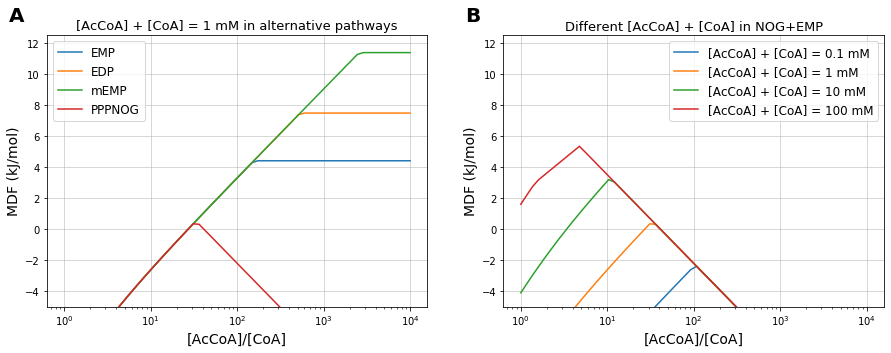

In [10]:
fig1 = plt.figure(figsize=(15, 5))

sp1 = plt.subplot(121)
for name in filter(lambda x: x != 'NOGEMP', pathway_names):
    plt.plot(ratio_range,np.array([mdf_result.mdf.magnitude for mdf_result in CoA_ratio_MDF_results[name]]), label=name)

plt.xscale("log")
plt.legend(fontsize = 12)
plt.ylabel('MDF (kJ/mol)',fontsize=14)
plt.xlabel('[AcCoA]/[CoA]',fontsize=14)
sp1.set_ylim(-5,12.5)
sp1.set_title('[AcCoA] + [CoA] = 1 mM in alternative pathways', fontsize=13)
sp1.grid(linewidth = 0.5)
sp1.annotate("A", xy=(-0.1, 1.05), xycoords="axes fraction",fontsize = 20, fontweight = 'demibold')


sp2 = plt.subplot(122)
for moiety in CoA_moieties:
    plt.plot(ratio_range,np.array([mdf_result.mdf.magnitude for mdf_result in moiety_CoA_ratio_MDF_results[moiety]]),
             label='[AcCoA] + [CoA] = ' + str(moiety.m_as('mM')) + ' mM')
plt.xscale("log")
plt.legend(fontsize = 12)
plt.ylabel('MDF (kJ/mol)',fontsize=14)
plt.xlabel('[AcCoA]/[CoA]',fontsize=14)
sp2.set_ylim(-5,12.5)
sp2.set_title('Different [AcCoA] + [CoA] in NOG+EMP', fontsize=13)
sp2.grid(linewidth = 0.5)
sp2.annotate("B", xy=(-0.1, 1.05), xycoords="axes fraction",fontsize = 20, fontweight = 'demibold')

We also perform here an ratio sweep with differing concentrations of inorganic phosphate (Pi). We fixed these concentrations by applying __eq.fix_concentrations__.

In [11]:
Pi_concs = [Q_(val,'mM') for val in [0.1,1,10,100]]
Pi_CoA_ratio_MDF_results = dict([(Pi_conc, eq.MDF_ratio_sweep('AcCoA',
                                                             'CoA',
                                                             ratio_range,
                                                             total_CoA_conc,
                                                             'NOGEMP',
                                                             eq.fix_concentrations(cs_default_bounds,[('Pi',Pi_conc)]),
                                                             E_coli_con, 
                                                             custom_dGs = False)[0]) 
                                 for Pi_conc in filter(lambda x: x != cs_default_bounds.get_bounds('Pi','lower').to('mM'), Pi_concs)])
Pi_CoA_ratio_MDF_results[(cs_default_bounds.get_bounds('Pi','lower')).to('mM')] = CoA_ratio_NOGEMP
Pi_10mM_CoA_ratio_MDF_results = dict([(Pi_conc, eq.MDF_ratio_sweep('AcCoA',
                                                             'CoA',
                                                             ratio_range,
                                                             10*total_CoA_conc,
                                                             'NOGEMP',
                                                             eq.fix_concentrations(cs_default_bounds,[('Pi',Pi_conc)]),
                                                             E_coli_con, 
                                                             custom_dGs = False)[0]) 
                                 for Pi_conc in filter(lambda x: x != cs_default_bounds.get_bounds('Pi','lower').to('mM'), Pi_concs)])
Pi_CoA_ratio_MDF_results[(cs_default_bounds.get_bounds('Pi','lower')).to('mM')] = CoA_ratio_NOGEMP
Pi_10mM_CoA_ratio_MDF_results[(cs_default_bounds.get_bounds('Pi','lower')).to('mM')] = moiety_CoA_ratio_MDF_results[Q_(10,'mM')]

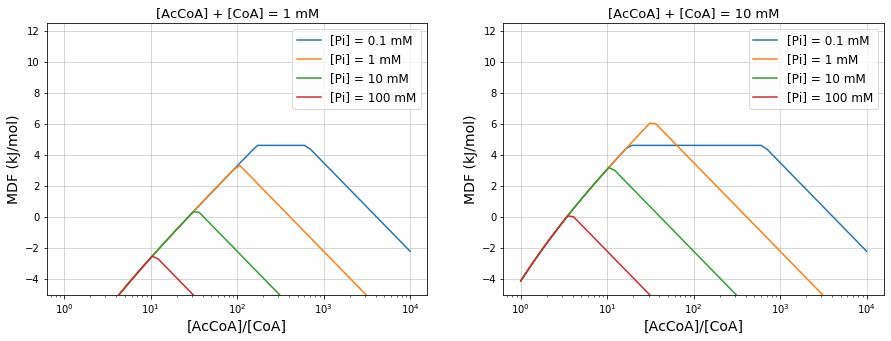

In [12]:
fig1 = plt.figure(figsize=(15, 5))
ax = plt.subplot(121)
for Pi_conc in Pi_concs:
    plt.plot(ratio_range,np.array([mdf_result.mdf.magnitude for mdf_result in Pi_CoA_ratio_MDF_results[Pi_conc]]),
             label='[Pi] = ' + str(Pi_conc.m_as('mM')) + ' mM')

plt.xscale("log")
plt.legend(fontsize = 12)
plt.ylabel('MDF (kJ/mol)',fontsize=14)
plt.xlabel('[AcCoA]/[CoA]',fontsize=14)
ax.set_ylim(-5,12.5)
ax.set_title('[AcCoA] + [CoA] = 1 mM', fontsize=13)
ax.grid(linewidth = 0.5)

ax2 = plt.subplot(122)
for Pi_conc in Pi_concs:
    plt.plot(ratio_range,np.array([mdf_result.mdf.magnitude for mdf_result in Pi_10mM_CoA_ratio_MDF_results[Pi_conc]]),
             label='[Pi] = ' + str(Pi_conc.m_as('mM')) + ' mM')

plt.xscale("log")
plt.legend(fontsize = 12)
plt.ylabel('MDF (kJ/mol)',fontsize=14)
plt.xlabel('[AcCoA]/[CoA]',fontsize=14)
ax2.set_ylim(-5,12.5)
ax2.set_title('[AcCoA] + [CoA] = 10 mM', fontsize=13)
ax2.grid(linewidth = 0.5)

# Effects of implementing substrate channeling

To implement substrate channeling between the ketothiolase and acetoacetyl-CoA reductase enzymes, we have edited the csv pathway files, removing both reactions labelled as PhaA and PhaB and adding the net reaction PhaAB. Then the ratio sweep analysis is performed again, both for the multiple pathways and changing CoA moieties in NOG+EMP:

In [13]:
SC_pathway_names = [name + '_SC' for name in pathway_names]

SC_CoA_ratio_MDF = dict([(name,eq.MDF_ratio_sweep('AcCoA',
                                              'CoA',
                                              ratio_range,
                                              total_CoA_conc,
                                              name,
                                              cs_default_bounds,
                                              E_coli_con,
                                              custom_dGs = False)[0])
                     for name in SC_pathway_names])
SC_moiety_CoA_ratio_MDF = dict([(moiety,eq.MDF_ratio_sweep('AcCoA',
                                              'CoA',
                                              ratio_range,
                                              moiety,
                                              'NOGEMP_SC',
                                              cs_default_bounds,
                                              E_coli_con,
                                              custom_dGs = False)[0])
                     for moiety in filter(lambda x: x != total_CoA_conc, CoA_moieties)])
SC_moiety_CoA_ratio_MDF[total_CoA_conc] = SC_CoA_ratio_MDF['NOGEMP_SC']

Text(-0.1, 1.05, 'B')

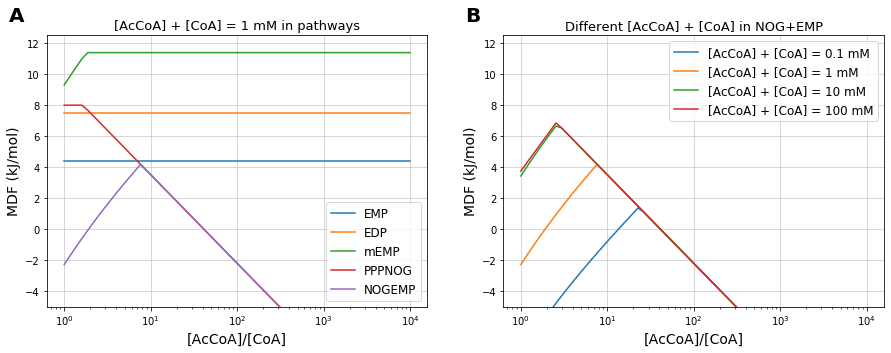

In [14]:
fig2 = plt.figure(figsize=(15, 5))
sp1 = plt.subplot(121)
for name in pathway_names:
    plt.plot(ratio_range,np.array([mdf_result.mdf.magnitude for mdf_result in SC_CoA_ratio_MDF[name + '_SC']]), label=name)
plt.xscale("log")
plt.legend(fontsize = 12)
plt.ylabel('MDF (kJ/mol)',fontsize=14)
plt.xlabel('[AcCoA]/[CoA]',fontsize=14)
sp1.set_ylim(-5,12.5)
sp1.set_title('[AcCoA] + [CoA] = 1 mM in pathways', fontsize=13)
sp1.grid(linewidth = 0.5)
sp1.annotate("A", xy=(-0.1, 1.05), xycoords="axes fraction",fontsize = 20, fontweight = 'demibold')


sp2 = plt.subplot(122)
for moiety in CoA_moieties:
    plt.plot(ratio_range,np.array([mdf_result.mdf.magnitude for mdf_result in SC_moiety_CoA_ratio_MDF[moiety]]),
             label='[AcCoA] + [CoA] = ' + str(moiety.m_as('mM')) + ' mM')
plt.xscale("log")
plt.legend(fontsize = 12)
plt.ylabel('MDF (kJ/mol)',fontsize=14)
plt.xlabel('[AcCoA]/[CoA]',fontsize=14)
sp2.set_ylim(-5,12.5)
sp2.set_title('Different [AcCoA] + [CoA] in NOG+EMP', fontsize=13)
sp2.grid(linewidth = 0.5)
sp2.annotate("B", xy=(-0.1, 1.05), xycoords="axes fraction",fontsize = 20, fontweight = 'demibold')

## Substrate channeling of all enzymes of *phaCAB*

We have also explored the effect of implementing substrate channeling between the three enzymes which catalyze the conversion of acetyl-CoA to PHB: ketothiolase, acetoacetyl-CoA reductase, and PHB synthase:

In [15]:
SC2_pathway_names = [name + '_SC2' for name in pathway_names]

SC2_CoA_ratio_MDF = dict([(name,eq.MDF_ratio_sweep('AcCoA',
                                              'CoA',
                                              ratio_range,
                                              total_CoA_conc,
                                              name,
                                              cs_default_bounds,
                                              E_coli_con,
                                              custom_dGs = False)[0])
                     for name in SC2_pathway_names])
SC2_moiety_CoA_ratio_MDF = dict([(moiety,eq.MDF_ratio_sweep('AcCoA',
                                              'CoA',
                                              ratio_range,
                                              moiety,
                                              'NOGEMP_SC2',
                                              cs_default_bounds,
                                              E_coli_con,
                                              custom_dGs = False)[0])
                     for moiety in filter(lambda x: x != total_CoA_conc, CoA_moieties)])
SC2_moiety_CoA_ratio_MDF[total_CoA_conc] = SC2_CoA_ratio_MDF['NOGEMP_SC2']

Text(-0.1, 1.05, 'B')

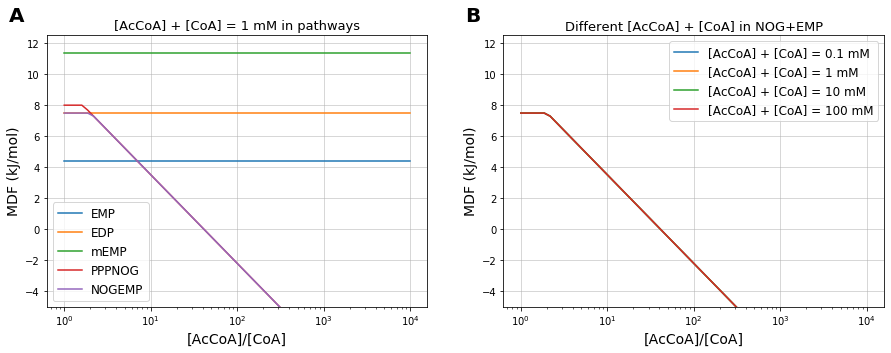

In [16]:
fig2 = plt.figure(figsize=(15, 5))
sp1 = plt.subplot(121)
for name in pathway_names:
    plt.plot(ratio_range,np.array([mdf_result.mdf.magnitude for mdf_result in SC2_CoA_ratio_MDF[name + '_SC2']]), label=name)
plt.xscale("log")
plt.legend(fontsize = 12)
plt.ylabel('MDF (kJ/mol)',fontsize=14)
plt.xlabel('[AcCoA]/[CoA]',fontsize=14)
sp1.set_ylim(-5,12.5)
sp1.set_title('[AcCoA] + [CoA] = 1 mM in pathways', fontsize=13)
sp1.grid(linewidth = 0.5)
sp1.annotate("A", xy=(-0.1, 1.05), xycoords="axes fraction",fontsize = 20, fontweight = 'demibold')


sp2 = plt.subplot(122)
for moiety in CoA_moieties:
    plt.plot(ratio_range,np.array([mdf_result.mdf.magnitude for mdf_result in SC2_moiety_CoA_ratio_MDF[moiety]]),
             label='[AcCoA] + [CoA] = ' + str(moiety.m_as('mM')) + ' mM')
plt.xscale("log")
plt.legend(fontsize = 12)
plt.ylabel('MDF (kJ/mol)',fontsize=14)
plt.xlabel('[AcCoA]/[CoA]',fontsize=14)
sp2.set_ylim(-5,12.5)
sp2.set_title('Different [AcCoA] + [CoA] in NOG+EMP', fontsize=13)
sp2.grid(linewidth = 0.5)
sp2.annotate("B", xy=(-0.1, 1.05), xycoords="axes fraction",fontsize = 20, fontweight = 'demibold')

Higher CoA moieties no longer have an effect on MDF (when AcCoA/CoA is kept constant), and NOG+EMP is no longer limited by the reaction catalyzed by ketothiolase at any AcCoA/CoA higher than 1.

Bottleneck Reactions = Gap, Pgk, Pgam, Eno


'MDF = 7.486 kilojoule / mole'

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,SucP,Pi + Sucrose <=> Fructose + G1P,1.5 molar / second,-8.688747928841005 kilojoule / mole,-8.688747928841005 kilojoule / mole,-8.688747928841012 kilojoule / mole,0.000000e+00
1,Pgm,G1P <=> G6P,1.5 molar / second,-7.414946410704452 kilojoule / mole,-7.414946410704452 kilojoule / mole,-7.486173590896934 kilojoule / mole,-6.035689e-17
2,Pgi,G6P <=> F6P,1.5 molar / second,2.504746329360183 kilojoule / mole,2.504746329360183 kilojoule / mole,-7.486173590896937 kilojoule / mole,-6.035689e-17
3,CscK,ATP + Fructose <=> ADP + F6P,1.5 molar / second,-18.47857882414626 kilojoule / mole,-18.47857882414626 kilojoule / mole,-34.245671769502884 kilojoule / mole,0.000000e+00
4,Tal,E4P + F6P <=> GADP + S7P,2.0 molar / second,0.6928028030912127 kilojoule / mole,0.6928028030912127 kilojoule / mole,-7.486173590896941 kilojoule / mole,1.110223e-16
5,Tkt,GADP + S7P <=> R5P + X5P,2.0 molar / second,3.8258091024354592 kilojoule / mole,3.8258091024354592 kilojoule / mole,-7.486173590896939 kilojoule / mole,0.000000e+00
6,RpiA,R5P <=> Ru5P,2.0 molar / second,2.0079526585601943 kilojoule / mole,2.0079526585601943 kilojoule / mole,-7.4861735908969385 kilojoule / mole,0.000000e+00
7,AraD,Ru5P <=> X5P,2.0 molar / second,-3.365693996619711 kilojoule / mole,-3.365693996619711 kilojoule / mole,-9.958028318648507 kilojoule / mole,0.000000e+00
8,Xpk,Pi + X5P <=> H2O + GADP + AcP,4.0 molar / second,-60.176984488506015 kilojoule / mole,-60.176984488506015 kilojoule / mole,-37.357201108877966 kilojoule / mole,0.000000e+00
9,TpiA,GADP <=> DAHP,1.0 molar / second,-5.524778053934204 kilojoule / mole,-5.524778053934204 kilojoule / mole,-7.486173590896943 kilojoule / mole,0.000000e+00


,compound,concentration,shadow_price,lower_bound,upper_bound
0,H2O,1.0 molar,-2.500000e-01,1.0 molar,1.0 molar
1,ATP,0.005000000000000002 molar,-2.500000e-01,0.005 molar,0.005 molar
2,ADP,0.0005000000000000001 molar,2.500000e-01,0.0005 molar,0.0005 molar
3,NAD,0.0010000000000000037 molar,2.500000e-01,0.001 molar,0.001 molar
4,Pi,0.009999999999999995 molar,2.500000e-01,0.01 molar,0.01 molar
5,NADH,0.00010000000000000026 molar,-2.500000e-01,0.0001 molar,0.0001 molar
6,CoA,0.0004999999999999996 molar,0.000000e+00,0.5 millimolar,0.5 millimolar
7,CO2,9.999999999999997e-06 molar,7.349188e-17,1e-05 molar,1e-05 molar
8,AcCoA,0.0005000000000000006 molar,0.000000e+00,0.5 millimolar,0.5 millimolar
9,PYR,5.20639555878388e-05 molar,-1.533463e-17,1e-06 molar,0.01 molar


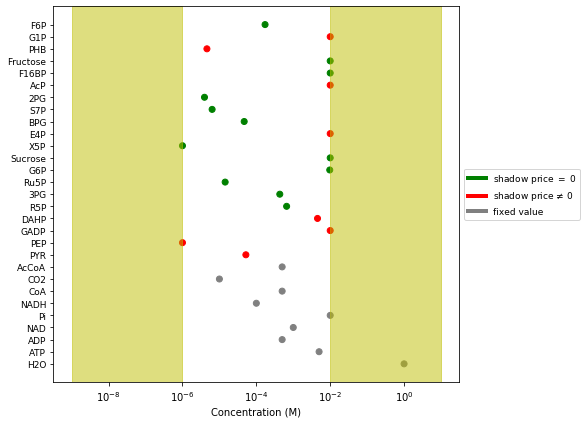

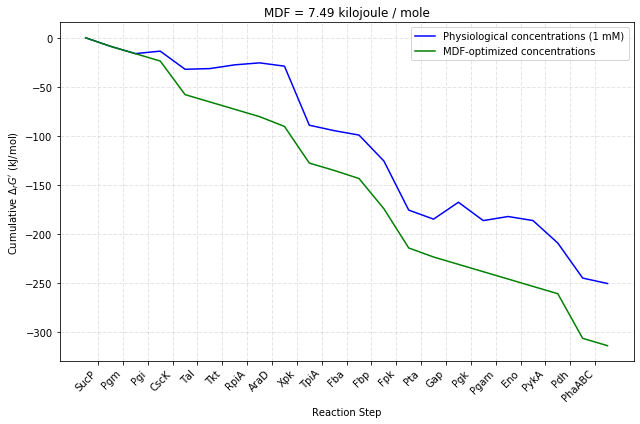

In [17]:
print('Bottleneck Reactions = ' + ', '.join(eq.pathway_bottlenecks(SC2_CoA_ratio_MDF['NOGEMP_SC2'][0])))
eq.print_MDF_results(SC2_CoA_ratio_MDF['NOGEMP_SC2'][0],cmpd_settings = cs_default_bounds)